<a href="https://colab.research.google.com/github/Praveen-Web-Dev/Angular-Practice-and-revision-Projects/blob/main/Theme_3_4_4_3_%E2%80%93_Rebound_Variation_by_Income_Level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

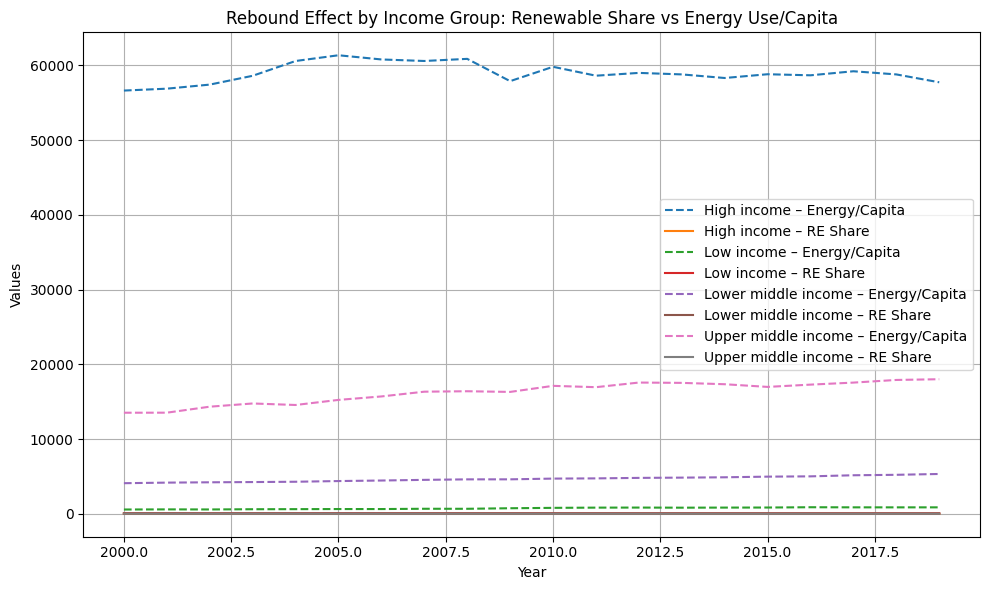


Average Renewable Share and Energy Use Per Capita in First vs Last Year by Income Group:


--- High income ---
2000: Renewable Share = 12.95%, Energy Use/Capita = 56644.72 kWh
2019: Renewable Share = 19.26%, Energy Use/Capita = 57751.60 kWh

--- Low income ---
2000: Renewable Share = 84.94%, Energy Use/Capita = 586.44 kWh
2019: Renewable Share = 73.97%, Energy Use/Capita = 875.45 kWh

--- Lower middle income ---
2000: Renewable Share = 57.05%, Energy Use/Capita = 4106.45 kWh
2019: Renewable Share = 45.96%, Energy Use/Capita = 5341.57 kWh

--- Upper middle income ---
2000: Renewable Share = 22.86%, Energy Use/Capita = 13536.72 kWh
2019: Renewable Share = 18.74%, Energy Use/Capita = 18020.43 kWh


In [6]:
# STEP 1: Upload and read the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Upload CSV
df = pd.read_csv('/content/cleaned_dataset.csv')

# STEP 2: Filter relevant columns
df = df[[
    'year',
    'income_group',
    'renewable_energy_share_in_the_total_final_energy_consumption_(%)',
    'primary_energy_consumption_per_capita_(kwh/person)'
]]

# Drop rows with missing values
df = df.dropna()

# Rename for easier handling
df.rename(columns={
    'renewable_energy_share_in_the_total_final_energy_consumption_(%)': 'renewable_share',
    'primary_energy_consumption_per_capita_(kwh/person)': 'energy_per_capita',
    'income_group': 'income'
}, inplace=True)

# STEP 3: Group by income group and year
df_grouped = df.groupby(['income', 'year'], as_index=False).agg({
    'renewable_share': 'mean',
    'energy_per_capita': 'mean'
})

# STEP 4: Plot the trends
plt.figure(figsize=(10, 6))
income_levels = df_grouped['income'].unique()

for income in income_levels:
    group = df_grouped[df_grouped['income'] == income]
    plt.plot(group['year'], group['energy_per_capita'], label=f'{income} – Energy/Capita', linestyle='--')
    plt.plot(group['year'], group['renewable_share'], label=f'{income} – RE Share', linestyle='-')

plt.title('Rebound Effect by Income Group: Renewable Share vs Energy Use/Capita')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 5: Print first and last year values
print("\nAverage Renewable Share and Energy Use Per Capita in First vs Last Year by Income Group:\n")

for income_level in income_levels:
    subset = df_grouped[df_grouped['income'] == income_level]

    if not subset.empty:
        first_year = subset['year'].min()
        last_year = subset['year'].max()

        first_row = subset[subset['year'] == first_year]
        last_row = subset[subset['year'] == last_year]

        print(f"\n--- {income_level} ---")
        if not first_row.empty:
            renewable_first = first_row['renewable_share'].values[0]
            energy_first = first_row['energy_per_capita'].values[0]
            print(f"{first_year}: Renewable Share = {renewable_first:.2f}%, Energy Use/Capita = {energy_first:.2f} kWh")
        else:
            print(f"{first_year}: No data available")

        if not last_row.empty:
            renewable_last = last_row['renewable_share'].values[0]
            energy_last = last_row['energy_per_capita'].values[0]
            print(f"{last_year}: Renewable Share = {renewable_last:.2f}%, Energy Use/Capita = {energy_last:.2f} kWh")
        else:
            print(f"{last_year}: No data available")
